Mean Squared Error (MSE): 730575456.3026994
R-squared (R²): 0.9047530135526508


<Figure size 1000x600 with 0 Axes>

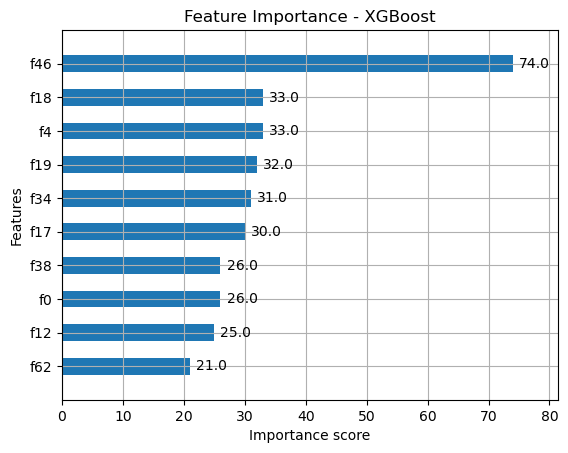

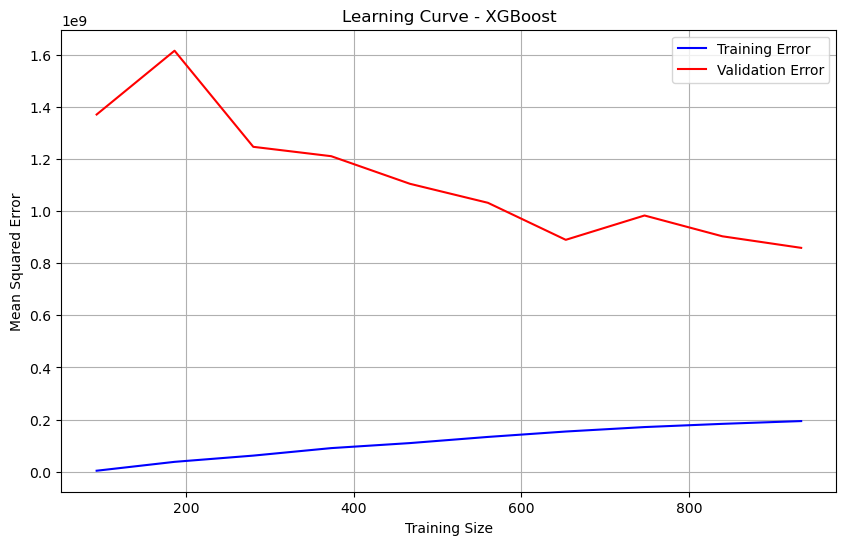

In [13]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load Ames Housing dataset from OpenML
data = fetch_openml(name='house_prices', version=1, as_frame=True)
X = data.data
y = data.target

# Handling missing values (impute missing data)
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply Label Encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_imputed[:, X.columns.get_loc(col)] = label_encoder.fit_transform(X_imputed[:, X.columns.get_loc(col)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.5)
plt.title("Feature Importance - XGBoost")
plt.savefig('Feature Importance - XGBoost.png')
plt.show()

# Learning Curve Plot
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label="Training Error", color='blue')
plt.plot(train_sizes, -test_scores.mean(axis=1), label="Validation Error", color='red')
plt.title("Learning Curve - XGBoost")
plt.xlabel("Training Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.savefig('Learning Curve - XGBoost.png')
plt.show()
